In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from astropy.time import Time

In [2]:
def readfile(filename):
    with open(filename, 'r') as fin:
        # human readable string for information
        comment = fin.readline()
        # timestamps [channel velocities]
        header = fin.readline()
        data = fin.readlines()

    chan_vel = np.array(header.strip().split(',')[1:-1], dtype=float)

    for cntr, line in enumerate(data):
        if cntr < 1:
            file_data = np.array(line.strip().split(',')[:-1], dtype=float)
        else:
            file_data = np.vstack([file_data, np.array(line.strip().split(',')[:-1], dtype=float)])

    timestamps = file_data[:,0]
    spectra = file_data[:,1:]
    
    return [chan_vel, timestamps, spectra]

In [3]:
def ts2datetime(timestamps, epoch=0., tsformat='mjd'):
    return Time(timestamps + epoch, format=tsformat)

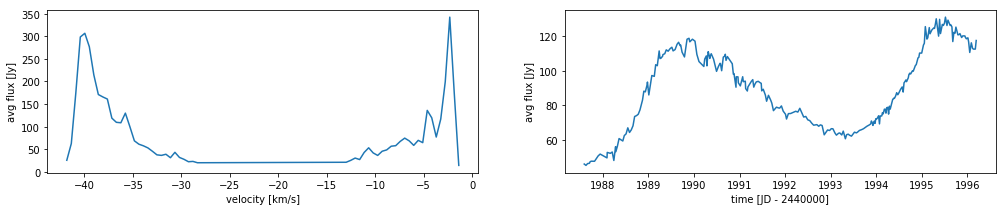

In [4]:
filename = 'data/oh357/oh3573s2.ts'
[chan_vel, timestamps, spectra] = readfile(filename)
# from column header JDm2440000 = JD - 2440000 (epoch=1900)
ts_jd = ts2datetime(timestamps, epoch=2440000, tsformat='jd')

fig, ax = plt.subplots(figsize=(17,3),
                       nrows=1,
                       ncols=2,
                       facecolor='white')
ax[0].plot(chan_vel, spectra.mean(axis=0))
ax[0].set_xlabel('velocity [km/s]')
ax[0].set_ylabel('avg flux [Jy]')
ax[1].plot(ts_jd.datetime, spectra.mean(axis=1))
ax[1].set_xlabel('time [JD - 2440000]')
ax[1].set_ylabel('avg flux [Jy]')
plt.show()

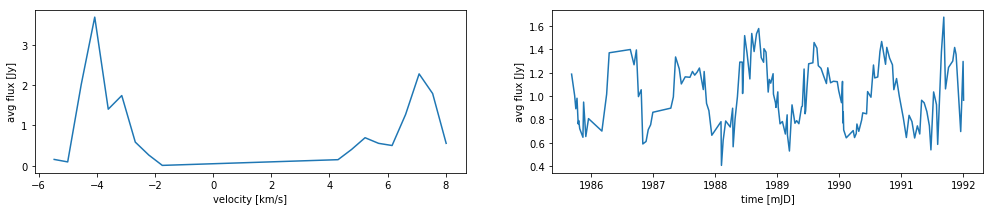

In [5]:
filename = 'data/vmic/vmic.tscatJD'
[chan_vel, timestamps, spectra] = readfile(filename)
# from column header the timestamps are already standard MJD
ts_jd = ts2datetime(timestamps)

fig, ax = plt.subplots(figsize=(17,3),
                       nrows=1,
                       ncols=2,
                       facecolor='white')
ax[0].plot(chan_vel, spectra.mean(axis=0))
ax[0].set_xlabel('velocity [km/s]')
ax[0].set_ylabel('avg flux [Jy]')
ax[1].plot(ts_jd.datetime, spectra.mean(axis=1))
ax[1].set_xlabel('time [mJD]')
ax[1].set_ylabel('avg flux [Jy]')
plt.show()